pip install mglearn
pip install sklearn  설치

### 지도학습
- 데이터라는 문제를 컴퓨터에게 주면, 컴퓨터는 문제에 대한 패턴을 찾고, 거기에 맞는 답을 찾는 것이다.
- 컴퓨터에게 문제와 정답을 제공해 주어야 한다.

### 비지도 학습
- 컴퓨터에게 문제(데이터)만 주고 컴퓨터가 스스로 해당 문제에 대한 패턴을 찾는 것

### 강화 학습
- 컴퓨터에게 아무 정보도 주지 않은 채로 컴퓨터가 알아서 문제를 해결하게 하는 것


# 지도학습의 종류
- 분류
    - 어떠한 데이터에 대해서 결과가 0이냐 1이냐를 구분 짓게 하는 것
    - 분류의 결과는 정수가 나온다.(분류의 결과는 클래스라고 한다)
- 회귀
    - 어떠한 데이터에 대해서 결과가 실숫값처럼 연속적인 형태를 띄게 된다.
    - 예를 들어 연봉 예측
    - 회귀의 결과물은 실숫값이 등장한다.
    

In [1]:
# 데이터 적재
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
# 특성(feature) 가져오기
feature_name = iris_dataset['feature_names']
feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# 데이터 가져오기
datas = iris_dataset['data']
datas[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# 정답(label 또는 target) 가져오기
targets = iris_dataset['target']
targets[:5]

array([0, 0, 0, 0, 0])

In [5]:
# 데이터 프레임으로 만들기
import pandas as pd

df_iris = pd.DataFrame(data=datas,columns=feature_name)
df_iris['target'] = targets

In [6]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 모델
- 모델이란? 필요한 데이터를 특정 알고리즘을 통해 패턴을 찾아낸 결과물

## 모델은 항상 평가라는 과정을 거쳐야 한다.
- 정확성, 신뢰성을 테스트 하는 과정

### 신뢰성 있는 모델 만들기
- 신뢰성이란, 모델에 입력하지 않은 데이터도 일정 수준 이상 맞출 수 있어야 하는 것
- 우리가 가지고 있는 모든 데이터를 모델 훈련에 투자하면 올바른 방법일까요?(X)
    - 가지고 있는 모든 데이터를 이용해서 훈련(학습)을 하고, 해당 데이터로 테스트를 하면 될까? (X)
- 가지고 있는 데이터의 일부를 잘라내서 일부는 훈련용으로, 또 다른 일부는 테스트 용으로 사용해서 모델의 정확도와 신뢰도를 높여야 한다.

In [7]:
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

데이터를 잘럿 넣을 때는 섞어서 잘라야 한다.
- 섞는 과정을 셔플링(shuffle)이라고 한다.
- 데이터를 자르는 과정을 스플릿(split)이라고 한다.

In [8]:
feature_name = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

from sklearn.model_selection import train_test_split
#                                                   feature               target            랜덤값 고정숫자
X_train, X_test, y_train, y_test = train_test_split(df_iris[feature_name],df_iris['target'],random_state=42)
# train : 75%, test : 25%

In [9]:
X_train.shape, y_train.shape

((112, 4), (112,))

x의 data 개수(112)와 y의 data 개수가 같아야 함

In [10]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [11]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


In [12]:
y_train.head()

4      0
32     0
142    2
85     1
86     1
Name: target, dtype: int32

<Figure size 1440x1440 with 0 Axes>

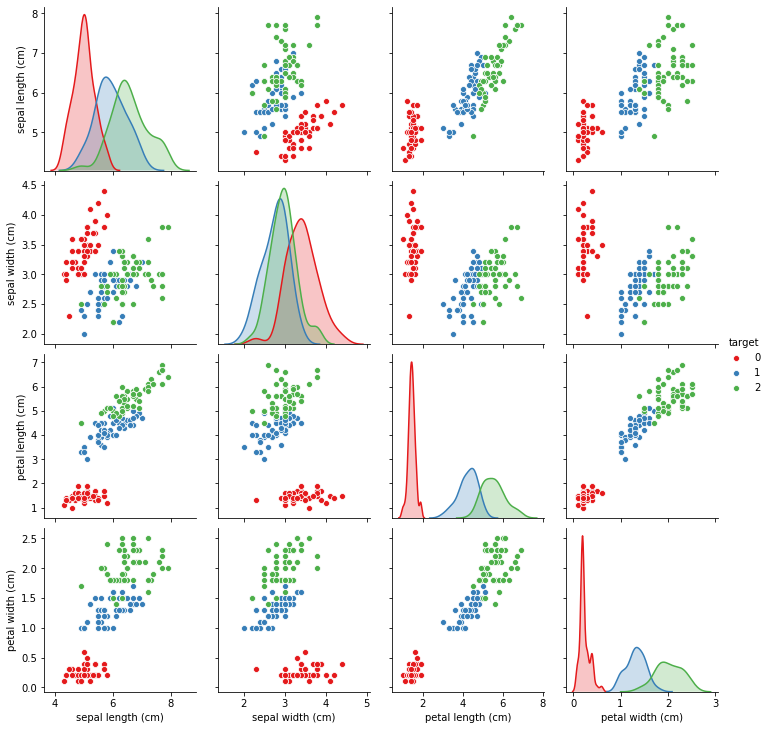

In [13]:
# 시각화 이용
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.pairplot(data=df_iris,palette='Set1',hue='target')
plt.show()

# 테스트 용으로 사용하기 좋은 K-NN (k-Nearest Neighbors)알고리즘
- 가장 가까운 이웃 k의 데이터 포인트를 찾는다.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # 알고리즘에 사용할 이웃의 개수

# 훈련
- fit() 메소드를 활용해서 훈련을 진행할 수 있다.

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 예측
- predict() 메소드를 이용해서 훈련된 모델이 데이터를 통해 분류/회귀를 진행한다.

In [21]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]]) # 예측을 할 때는 반드시 feature의 개수가 똑같아야 한다.
                # 2차원 배열 형태

In [22]:
X_new.shape

(1, 4)

In [23]:
X_train.shape

(112, 4)

In [26]:
prediction = knn.predict(X_new)[0]
prediction

0

In [28]:
iris_dataset['target_names'][prediction]

'setosa'

# 모델의 신뢰성을 확인하기
- 머신러닝에서는 얼맘나 잘 맞췄는가? 로 판단(score)
- 딥러닝에서는 얼마나 덜 못맞췄는가? 로 판단(loss, cost)

테스트(test)세트 밑 추후에는 검증(validation)세트로 나눠서 검사하는 것이 일반적이다.

In [29]:
# 우리가 만든 knn 모델은 X_test를 못봄
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

예측을 얼마나 잘 했는가 => 머신러닝의 신뢰도 판단

In [31]:
# 평가하기 y_test(답지)와 y_pred(컴퓨터가 푼 답)를 비교
np.mean(y_pred==y_test)

1.0

In [32]:
y_pred==y_test

73     True
18     True
118    True
78     True
76     True
31     True
64     True
141    True
68     True
82     True
110    True
12     True
36     True
9      True
19     True
56     True
104    True
69     True
55     True
132    True
29     True
127    True
26     True
128    True
131    True
145    True
108    True
143    True
45     True
30     True
22     True
15     True
65     True
11     True
42     True
146    True
51     True
27     True
Name: target, dtype: bool